Finding_donors for charity ML:

The goal here is to implement supervised learners on the census data set provided to determine which algorithm will provide the highest donation yield for a fictitious charity organization located in the Silicon Valley. Census data contains records of individuals with additional details like age, workclass, education_level, education_num, marital status and so on. 
To begin with we start with data exploration, data preprocessing then model evaluation.

Data Exploration:

A machine learning algorithm usually takes clean (and often tabular) data, and learns some pattern in the data, to make predictions on new data. However, when ML is used in real-world applications, the raw information that you get from the real-world is often not ready to be fed into the ML algorithm. So you need to preprocess that information to create input data for the ML algorithm. 

Using the census.csv dataset we will segregate the individuals into different groups based on the income criteria as 
1.total number of individuals
2.individuals with income more than \$50,000 annually, count_greater_50k
3.individuals with income at most \$50,000 annually, count_at_most_50k
4.percentage of individuals income more than \$50,000 annually, greater_percent

In [1]:
# Import libraries numpy, pandas, time, display, matplotlib
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

import matplotlib.pyplot as plt


# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("census.csv")

# Success - Display the first record
display(data.head(n=5))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [2]:
# Data Exploration 
# TODO: Total number of records
count_records = data['age'].count( )

# TODO: Number of records where individual's income is greater than $50,000
count_greater_50k = data[data.income==">50K"].income.count()

# TODO: Number of records where individual's income is less than or equal to $50,000
count_at_most_50k = data[data.income=="<=50K"].income.count()

# TODO: Percentage of individuals whose income is more than $50,000
greater_percent = float(count_greater_50k)*100/count_records

# Print the results


print ("Total number of records: {}".format(count_records))
print ("Individuals with income greater than $50,000: {}".format(count_greater_50k))
print ("Individuals making at most $50,000: {}".format(count_at_most_50k))
print ("Percentage of individuals with income greater than $50,000: {:.2f}%".format(greater_percent))

Total number of records: 45222
Individuals with income greater than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals with income greater than $50,000: 24.78%


,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba


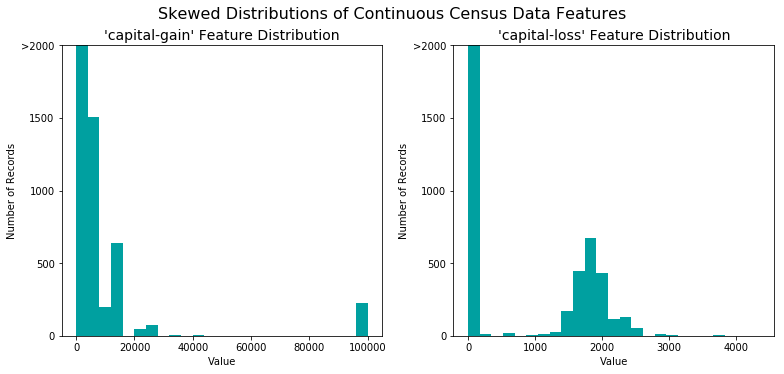

In [3]:
import matplotlib.pyplot as plt
from time import time
from IPython.display import display 
import visuals as vs

# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)
display(features_raw.head(n=5))

# Visualize skewed continuous features of original data
vs.distribution(data)

Data Preprocessing:
Data processing involves cleaning and reformating of data like checking for invalid entries or missing entries. 
Dataset provided has no such invalid or missing records.

Transforming Skewed Continuous Features:
Skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. 
The skewness value can be positive or negative, or undefined.The best way to fix it is to perform a log transform of the same data, with the intent to reduce the skewness.


,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,7.684784,0.0,40.0,United-States
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,13.0,United-States
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,40.0,United-States
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,40.0,United-States
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,40.0,Cuba
5,37,Private,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.000000,0.0,40.0,United-States
6,49,Private,9th,5.0,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.000000,0.0,16.0,Jamaica
7,52,Self-emp-not-inc,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,45.0,United-States
8,31,Private,Masters,14.0,Never-married,Prof-specialty,Not-in-family,White,Female,9.552866,0.0,50.0,United-States
9,42,Private,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,8.552367,0.0,40.0,United-States


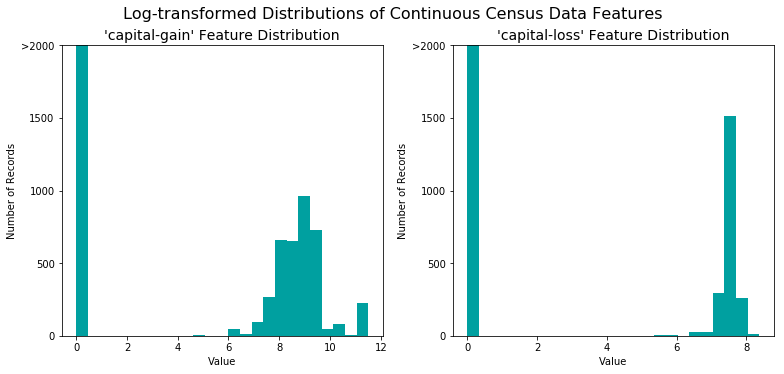

In [4]:
# Log-transform the skewed features

#In binary classification case skewed data means that one class is vastly more represented in the data than the other class.
#skewed datasets could lead to models that are biased towards to the majority labels.
#To mitigate this problem we are taking logarithm of the data to get normally distributed data
import matplotlib.pyplot as plt
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))
display(features_log_transformed.head(n=10))

# Visualize the new log distributions
vs.distribution(features_log_transformed, transformed = True)

In [5]:
# Import sklearn.preprocessing.StandardScaler
#Transforms features by scaling each feature to a given range.
#This estimator scales and translates each feature individually such that it is in the given range on the training set, 
#i.e. between zero and one.


from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the featuresscaler
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


In [6]:
# TODO: One-hot encode the 'features_raw' data using pandas.get_dummies()

# one hot encoding is done for the proper representation of the distinct elements of the variable.
# It involves assigning 1 to working feature and 0’s to other idle features to produce a balanced matrix, 
# which is easy to understand during complex computations inside algorithms. 
# One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features_raw)

# TODO: Encode the 'income_raw' data to numerical values
income = income_raw.apply(lambda x: 1 if x == ">50K" else 0)

display(income.head(n=10))

# Number of features after one-hot encoding
features_encoded = list(features_final.columns)


print ("{} Total number of features after one-hot encoding is.".format(len(features_encoded)))

display(features_final.head(n=5))

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    1
8    1
9    1
Name: income, dtype: int64

103 Total number of features after one-hot encoding is.


,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.301370,0.800000,0.667492,0.0,0.397959,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.452055,0.800000,0.000000,0.0,0.122449,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,0.287671,0.533333,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.493151,0.400000,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.150685,0.800000,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# Import train_test_split
# We need to split the data into random train and test subsets

from sklearn.cross_validation import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    income, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print ("Total number of samples in Training set is {} ".format(X_train.shape[0]))
print ("Total number of samples in Testing set is {} ".format(X_test.shape[0]))

Total number of samples in Training set is 36177 
Total number of samples in Testing set is 9045 


C:\Users\ck288\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Question 1:
Naive Predictor Performance

TN (True Negative) : Number of correct predictions that an instance is irrelevant
FP (False Positive) : Number of incorrect predictions that an instance is relevant
FN (False Negative) : Number of incorrect predictions that an instance is irrelevant
TP (True Positive) : Number of correct predictions that an instance is relevant
Accuracy(ACC) – The proportion of the total number of predictions that were correct.
Therefore, a model's ability to precisely predict those that make more than \$50,000 is more important than the model's ability to recall those individuals. 
We can use F-beta score as a metric that considers both precision and recall:
fscore = (1+beta**2)*(accuracy*recall)/(beta**2*accuracy+recall)


The 'accuracy' and 'fscore'for the naive predictor as calculated as below:


In [8]:
# TODO: Calculate accuracy

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import fbeta_score

# Sum of total number of ones in 'income' gives the number of people with income 50K because we are dealing with naive case.
# This sum is the value of true positive TP
TP = np.sum(income) 
print (TP)    # true positive count

FP = income.count() - TP # Subtracting false positive from income.count gives the value of false positive FP
print (FP)    # false positive count


#False negatives Predictions that should be true but were predicted as false
FN = 0 # Not considering false negative in naive case
TN = 0 # Not considering true negative in naive case


# accuracy, precision and recall calculation



pred_income=income.apply(lambda x:1) #here lambda is created as anonymous function that runs on the fly 


TP=sum(map(lambda x,y: 1 if x==1 and y==1 else 0, income,pred_income)) #True Positive
FP=sum(map(lambda x,y: 1 if x==0 and y==1 else 0, income,pred_income)) #False Positive
FN=sum(map(lambda x,y: 1 if x==1 and y==0 else 0, income,pred_income)) #False Negative

#accuracy is a performance measure that is a ratio of correctly predicted observation to the total observations.
accuracy = float(TP)/(TP+FP)

#Recall is the ratio of correctly predicted positive observations to the all observations in actual class 
recall = float(TP)/(TP+FN)

#precision = None

# TODO: Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
beta=0.5

#F-score is the harmonic mean of precision and recall:
fscore = (1+beta**2)*(accuracy*recall)/(beta**2*accuracy+recall)

# Print the results 
print ("Naive Predictor Result: [Accuracy score is : {:.4f}, F-score is: {:.4f}]".format(accuracy, fscore))

11208
34014
Naive Predictor Result: [Accuracy score is : 0.2478, F-score is: 0.2917]


Creating a Training and Predicting Pipeline is implemented as below:

In machine learning a framework for converting raw data to data usable by ML algorithm, training an ML algorithm, and finally using the output of the ML algorithm to perform actions in the real-world is the pipeline.A training and predicting pipeline
reduces the time taken to train the models effectively on any size of training data and perform predictions on the testing data. 

1.Accuracy score calculation for both training subset and testing set.
2.F-score calculation for both training subset and testing set.
3.Learner is fit on training data(X_train, y_train) and total prediction time is recorded
4.Prediction is performed on the testing set(X_test)
5.beta parameter is set to 0.5

In [9]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import fbeta_score



def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner.fit(X_train[:int(sample_size)],y_train[:int(sample_size)])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end-start
        
    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    
    print("predictions_test results are:")
    print(predictions_test)
    
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time

    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end-start
    
    print("Total training time is:")
    print(results['train_time'])
    
    print("Total prediction time is:")
    print(results['pred_time'])
            
    # TODO: Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300],predictions_train)
    
    print("Accuracy on training set:")
    print(results['acc_train'])
        
    # TODO: Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test,predictions_test)
    
    print("Accuracy on testing set:")
    print(results['acc_test'])
    
    # TODO: Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300],predictions_train,beta=0.5)
        
    # TODO: Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test,predictions_test,beta=0.5)
       
    # Success
    print ("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

Question 2: Model application
List three of the supervised learning models above that are appropriate for this problem that you will test on the census data. For each model chosen
Describe one real-world application in industry where the model can be applied.
What are the strengths of the model; when does it perform well?
What are the weaknesses of the model; when does it perform poorly?
What makes this model a good candidate for the problem, given what you know about the data?



Answer:

According to me the 3 supervised learning models suitable for this situation are:

1.Gaussian Naive Bayes (GaussianNB):

a. Pros/Strengths of Naive Bayes:
In machine learning, naive Bayes classifiers are a family of simple probabilistic classifiers based on applying Bayes' theorem with strong (naive) independence assumptions between the features.Naive Bayes classifier is computationally fast, simple to implement and highly scalable, requiring a number of parameters linear in the number of variables (features/predictors) in a learning problem.As the whole dataset is too big to fit in memory at once, Partial fit is done several times consecutively on different chunks of a dataset so as to implement online learning.

b. Cons/Weaknesses of Naive Bayes:
The disadvantage of with Naive-Bayes is that if you have no occurrences of a class label and a certain attribute value together (e.g. class="nice", shape="sphere") then the frequency-based probability estimate will be zero.This problem happens when we are drawing samples from a population and the drawn vectors are not fully representative of the population.
(ref:https://en.wikipedia.org/wiki/Naive_Bayes_classifier, 
     http://www.statsoft.com/textbook/naive-bayes-classifier)
     
c. Real world application in industry:
Naive Bayes clasiifier is used to support the assessment of individual risk of relapse or progression in patients diagnosed with brain tumour undergoing RT postoperatively.
(ref:http://www.sciencedirect.com/science/article/pii/S0167814007005221)

d. The reason for choosing Naive Bayes classifier:
   when we have a look at our dataset we that there are features who seem to be independent or having no relationship with the earnings of a person like relationship,race,sex,native-country, and workclass. Naive Bayes algorithm which has a fundamental assumption that each feature makes an independent and equal contribution to the outcome is well suited for this situation.



2.SVC

a. Pros/Strengths of SVC:
In machine learning, support vector machines (SVMs, also support vector networks) are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis.
Given a set of training examples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier.It performs similarly to logistic regression when linear separation and can handle high dimensional data well.

b. Cons/Weaknesses of SVC:
Disadvantage of SVM classifier is that it is susceptible to overfitting/training issues depending on kernel.
(ref:https://en.wikipedia.org/wiki/Support_vector_machine, 
     http://www.statsoft.com/textbook/support-vector-machines)
     
c. Real world application in industry:
SVC classifier is used in text (and hypertext) categorization to classify documents into predefined set of categories or handling and organizing online information.
(ref:http://140.123.102.14:8080/reportSys/file/paper/604410151/604410151_2_paper.pdf)

d. The reason for choosing SVC:
The dataset we are currently dealing has multiple driving features which can dealt very well with SVC. As SVC is Effective in high dimensional spaces where number of dimensions is greater than the number of samples.SVC is basically a two-class classifier. Multi-class problems are solved  in a one-against-rest fashion. 

   

3.AdaBoost classifier

a. Pros/Strengths of Adaboost classifier:
AdaBoost (Adaptive Boosting) is a powerful classifier that works well on both basic and more complex recognition problems. AdaBoost works by creating a highly accurate classifier by combining many relatively weak and inaccurate classifiers. Therefore acts as a meta algorithm, which allows you to use it as a wrapper for other classifiers

b. Cons/Weaknesses of Adaboost classifier:
However the disadvantage of AdaBoost is that it can be sensitive to noisy data and outliers. In some problems it can be susceptible to the overfitting problem than most learning algorithms.
(ref:https://en.wikipedia.org/wiki/AdaBoost, 
     http://math.mit.edu/~rothvoss/18.304.3PM/Presentations/1-Eric-Boosting304FinalRpdf.pdf)

c. Real world application in industry:
Detecting faces in an image using Viola-Jones face detector.The Viola-Jones face detector uses a “rejection cascade” consisting of many layers of classifiers. If at any layer the detection window is _not _recognized as a face, it’s rejected and we move on to the next window. 
(ref:http://mccormickml.com/2013/12/13/adaboost-tutorial/)

d. The reason for choosing Adaboost classifier:
Analysing the census dataset given we can see that there are a few features which are not directly related or predict an individuals income which seem to be the weak features for prediction.In such case AdaBoosting is an approach to machine learning based on the idea of creating a highly accurate prediction rule by combining many relatively weak and inaccurate
rules. It combines multiple “weak classifiers” into a single “strong classifier”. Thus Adaboost classifier is best suited for this dataset.


Implementation: Initial Model Evaluation

In the code cell, you will need to implement the following:
Import the three supervised learning models you've discussed in the previous section.
Initialize the three models and store them in 'clf_A', 'clf_B', and 'clf_C'.
Use a 'random_state' for each model you use, if provided.
Note: Use the default settings for each model — you will tune one specific model in a later section.
Calculate the number of records equal to 1%, 10%, and 100% of the training data.
Store those values in 'samples_1', 'samples_10', and 'samples_100' respectively.


Answer:


In the code cell below the three supervised learning models GaussianNB, SVC and AdaBoostClassifier are imported from sklearn and initialized.
The training data(X_train) is spilt into samples for 1%, 10%, and 100% of training data.
As the whole dataset is too big to fit in memory at once, Partial fit is done several times consecutively on different chunks of a dataset as 'samples_1', 'samples_10', and 'samples_100'.
Train each model on the same training set to obtain the metrics like total training time, prediction time, accuracy on training set and testing set for each of the 3 models used.


In [10]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

# TODO: Initialize the three models
clf_GNB = GaussianNB()        #Can perform online updates to model parameters via partial_fit method.
clf_SVC = SVC(random_state=0)
clf_ADAB = AdaBoostClassifier(random_state=0)

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_1 = len(X_train)/100
samples_10 = len(X_train)/10
samples_100 = len(X_train)

# Collect results on the learners
results = {}

#As the whole dataset is too big to fit in memory at once,
#Partial fit is done several times consecutively on different chunks of a dataset so as to implement online learning.
        
for clf in [clf_GNB, clf_SVC, clf_ADAB]:
    clf_name = clf.__class__.__name__
    
    results[clf_name] = {}
    
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
       
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)
        
#print(results, accuracy, fscore)
        
# Run metrics visualization for the three supervised learning models chosen
#vs.evaluate(results, accuracy, fscore)


predictions_test results are:
[1 1 1 ..., 1 1 1]
Total training time is:
0.0015037059783935547
Total prediction time is:
0.03459572792053223
Accuracy on training set:
0.4
Accuracy on testing set:
0.351796572692
GaussianNB trained on 361.77 samples.
predictions_test results are:
[1 1 1 ..., 1 1 1]
Total training time is:
0.011997699737548828
Total prediction time is:
0.03509330749511719
Accuracy on training set:
0.383333333333
Accuracy on testing set:
0.366058595909
GaussianNB trained on 3617.7 samples.
predictions_test results are:
[1 1 1 ..., 1 1 1]
Total training time is:
0.14134812355041504
Total prediction time is:
0.0726931095123291
Accuracy on training set:
0.593333333333
Accuracy on testing set:
0.59767827529
GaussianNB trained on 36177 samples.
predictions_test results are:
[0 0 0 ..., 0 0 0]
Total training time is:
0.020554065704345703
Total prediction time is:
0.4894413948059082
Accuracy on training set:
0.76
Accuracy on testing set:
0.756218905473
SVC trained on 361.77 sampl

C:\Users\ck288\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


predictions_test results are:
[0 0 0 ..., 0 0 1]
Total training time is:
1.2380750179290771
Total prediction time is:
2.85833740234375
Accuracy on training set:
0.833333333333
Accuracy on testing set:
0.832614704256
SVC trained on 3617.7 samples.
predictions_test results are:
[0 0 0 ..., 0 0 1]
Total training time is:
131.41514611244202
Total prediction time is:
20.728824615478516
Accuracy on training set:
0.853333333333
Accuracy on testing set:
0.837147595357
SVC trained on 36177 samples.
predictions_test results are:
[0 0 0 ..., 0 0 1]
Total training time is:
0.07518959045410156
Total prediction time is:
0.10277223587036133
Accuracy on training set:
0.893333333333
Accuracy on testing set:
0.820674405749
AdaBoostClassifier trained on 361.77 samples.
predictions_test results are:
[0 0 0 ..., 0 0 1]
Total training time is:
0.25516605377197266
Total prediction time is:
0.10280561447143555
Accuracy on training set:
0.84
Accuracy on testing set:
0.849861802101
AdaBoostClassifier trained on

Question 3: Choosing the Best Model

Based on the evaluation you performed earlier, in one to two paragraphs, explain to CharityML which of the three models you believe to be most appropriate for the task of identifying individuals that make more than \$50,000.

Which model has the highest score? Your answer should include discussion of the:
metrics - F score on the testing when 100% of the training data is used
prediction/training time
the algorithm's suitability for the data.


Answer:


Based on metrics and prediction/training time:

Oberving the results from the above code cell for the metrics like training time, prediction time, accuracy on training set and accuracy on testing set, it can be seen that AdaBoostClassifier with prediction time = 0.0625, accuracy on training set = 0.85, accuracy on testing set = 0.8576 performs better than Naive Bayes and SVC with the same training and testing set provided. Thus AdaBoostClassifier is the most appropriate model for the task.


Based on algorithm's suitability for the data:

Analysing the census dataset given we can see that there are a few features which are not directly related or predict an individuals income which seem to be the weak features for prediction.
As AdaBoost can select informative features from a potentially very large feature pool, automatically finding good features for classification. Instead, one just needs to define a list of possibly informative features, and AdaBoost will choose those that are actually informative.It sequentially selects weak classifiers (i.e., ones that do not perform perfectly when used on their own) from a candidate pool and weights each of them based on their error. A weak learner is any statistical classifier that performs better than pure chance. 
In my opinion Adaboost classifier best suits this situation.

(ref:https://en.wikipedia.org/wiki/AdaBoost, 
     http://math.mit.edu/~rothvoss/18.304.3PM/Presentations/1-Eric-Boosting304FinalRpdf.pdf)

Question 4: Describing the Model in Layman's Terms

In one to two paragraphs, explain to CharityML, in layman's terms, how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical jargon, such as describing equations.


Answer:


To begin with the dataset, it has about 13 features describing the earning of an individually and hence can predict in an individual can be a potential donor for charity as follows:

1.age - A younger individual has higher possibility of being a donor. 
2.workclass - Better the workclass higher the possibility of being a donor.
3.education_level - Higher the education_level higher the possibility of being a donor.
4.education-num - Higher the education_num higher the possibility of being a donor.
5.marital-status - An individual Never-married can be a potential donor.
6.occupation - An individual with occupation of Exec-managerial has higher the possibility of being a donor.
7.relationship - A person Not-in-family can be a potential donor.
8.race - Sometimes the race of an individual can also have an influence on the individual earnings and hence can conclude if an individual can be a donor.
9.sex - Sometimes the sex of an individual can also have an influence on the individual earnings and hence can conclude if an individual can be a donor.
10.capital-gain -  Higher the capital-gain higher the possibility of an individual being a donor.
11.capital-loss - Higher the capital-loss lower the possibility of an individual being a donor.
12.hours-per-week - Higher the hours-per-week higher the possibility of an individual being a donor.
13.native-country - Sometimes the native-country can also have an influence on the individual earnings and hence can conclude if an individual can be a donor.

Above, we’ve defined multiple rules to classify an individual to be a donor or not. But these rules individually are not strong enough to successfully classify all the individuals.Therefore, these rules are called as weak learner/base learner.

To convert weak learner to strong learner, we’ll combine the prediction of each weak learner using methods like:
•   Using average/ weighted average
•   Considering prediction has higher vote

Boosting Algorithms combines weak learners to form a strong rule. This is an iterative process. After many iterations, the boosting algorithm combines these weak rules into a single strong prediction rule.

For choosing the right distribution, here are the following steps:

Step 1:  The weak/base learner takes all the distributions and assign equal weight or attention to each observation.

Step 2: If there is any prediction error caused by first base learning algorithm, then we pay higher attention to observations having prediction error. Then, we apply the next base learning algorithm.

Step 3: Iterate Step 2 till the limit of base learning algorithm is reached or higher accuracy is achieved.

Finally, it combines the outputs from weak learner and creates  a strong learner which eventually improves the prediction power of the model. Boosting pays higher focus on examples which are mis-classiﬁed or have higher errors by preceding weak rules.

Adaptive Boosting works on similar method as discussed above. It fits a sequence of weak learners on different weighted training data. It starts by predicting original data set and gives equal weight to each observation. If prediction is incorrect using the first learner, then it gives higher weight to observation which have been predicted incorrectly. Being an iterative process, it continues to add learner(s) until a limit is reached in the number of models or accuracy.

(ref:https://www.quora.com/What-is-AdaBoost, 
     https://www.analyticsvidhya.com/blog/2015/11/quick-introduction-boosting-algorithms-machine-learning/)

Model tuning:

Fine tune the chosen model. Use grid search (GridSearchCV) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
Import sklearn.grid_search.GridSearchCV and sklearn.metrics.make_scorer.
Initialize the classifier you've chosen and store it in clf.
Set a random_state if one is available to the same state you set before.
Create a dictionary of parameters you wish to tune for the chosen model.
Example: parameters = {'parameter' : [list of values]}.
Note: Avoid tuning the max_features parameter of your learner if that parameter is available!
Use make_scorer to create an fbeta_score scoring object (with $\beta = 0.5$).
Perform grid search on the classifier clf using the 'scorer', and store it in grid_obj.
Fit the grid search object to the training data (X_train, y_train), and store it in grid_fit.


Answer:


In the abstract sense of machine learning, tuning is learning from variable data based on some parameters which have been 
identified to affect system performance as evaluated by some appropriate metric. Improved performance reveals which 
parameter settings are more favorable (tuned) or less favorable (untuned).
In simple terms, tuning is essentially selecting the best parameters for an algorithm to optimize itsperformance given a 
working environment such as hardware, specific workloads, etc. And tuning in machine learning is an 
automated process for doing this.

Following are the steps in model tuning:

1.Import GridSearchCV, make_scorer, fbeta_score, AdaBoostClassifier libraries from sklearn 
2.Initialize an AdaBoostClassifier and create a dictionary of parameters 'n_estimators' and 'learning_rate'.
3.Import sklearn.grid_search.GridSearchCV and sklearn.metrics.make_scorer.
4.Grid search is an approach to parameter tuning that will methodically build and evaluate a model for each combination of   algorithm parameters specified in a grid. 
GridSearchCV applies cross-validation to select from a set of parameter values.
5.Calculate the accuracy anf F score for unoptimised and optimised models.

(ref: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

In [11]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries

from sklearn.grid_search import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

# TODO: Initialize the classifier
clf = AdaBoostClassifier(random_state=0)

# TODO: Create the parameters list you wish to tune
#parameters = {'n_estimators':[75,100,200]}
parameters = {'n_estimators':[75,200,500],'learning_rate':[1.0,1.5,2.0]}

# TODO: Make an fbeta_score scoring object
scorer = make_scorer(fbeta_score, beta=0.5)
# TODO: Perform grid search on the classifier using 'scorer' as the scoring method
grid_obj = GridSearchCV(clf, parameters,scoring=scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print ("For the Unoptimized model\n------")
print ("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print ("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print ("\n For the Optimized Model\n------")
print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

C:\Users\ck288\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
C:\Users\ck288\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ck288\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ck288\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ck288\Anaconda3\

For the Unoptimized model
------
Accuracy score on testing data: 0.8576
F-score on testing data: 0.7246

 For the Optimized Model
------
Final accuracy score on the testing data: 0.8677
Final F-score on the testing data: 0.7452


Question 5: Final Model Evaluation

What is your optimized model's accuracy and F-score on the testing data?
Are these scores better or worse than the unoptimized model?
How do the results from your optimized model compare to the naive predictor benchmarks you found earlier in Question 1?

Answer:

The accuracy and F1 score of the optimized, unoptimized models on testing data are as follows:

    Metric	        Benchmark Predictor	    Unoptimized Model	 Optimized Model
    Accuracy Score	0.2478	                0.8576	             0.8677
    F-score	        0.2917	                0.7246	             0.7452
   
Looking at the scores from the above table of the metrics, the Optimized Model with an accuracy score = 0.8677 and  F-score = 0.7452 looks like performing better than Unoptimized Model(Accuracy Score = 0.8576, F-score = 0.7246)

Also the results from the optimized model compared to the naive predictor benchmarks found earlier in Question 1 , 
from the scores, I can conclude that both the optimized model performs significantly better than the naive predictor benchmarks(Accuracy Scor = 0.2478, F-score = 0.2917). 

Feature Importance:
    
An important task when performing supervised learning on a dataset like the census data we study here is determining which features provide the most predictive power. By focusing on the relationship between only a few crucial features and the target label we simplify our understanding of the phenomenon, which is most always a useful thing to do. In the case of this project, that means we wish to identify a small number of features that most strongly predict whether an individual makes at most or more than \$50,000.

Choose a scikit-learn classifier (e.g., adaboost, random forests) that has a feature_importance_ attribute, which is a function that ranks the importance of features according to the chosen classifier. In the next python cell fit this classifier to training set and use this attribute to determine the top 5 most important features for the census dataset.


Answer: 

I choose GradientBoostingClassifier from scikit-learn that has a feature_importance_ attribute. 
In the code cell numbered 12, GradientBoosting classifier has been trained on the entire training set(X_train, y_train). 
Also the normalised weights for first 5 most predictive features have been plotted for better visualisation.


Implementation - Extracting Feature Importance:
    
Choose a scikit-learn supervised learning algorithm that has a feature_importance_ attribute availble for it. This attribute is a function that ranks the importance of each feature when making predictions based on the chosen algorithm.

In the code cell below, you will need to implement the following:
Import a supervised learning model from sklearn if it is different from the three used earlier.
Train the supervised model on the entire training set.
Extract the feature importances using '.feature_importances_'.


Answer:

In the code cell below, GradientBoostingClassifier model has been imported from sklearn which is different from the three supervised learning models used earlier.

GradientBoostingClassifier is then trained on on the entire training set(X_train, y_train).

GradientBoostingClassifier has a feature_importance_ attribute availble using which we are extracting the feature importances and plotting the same using vs.feature_plot as shown below.


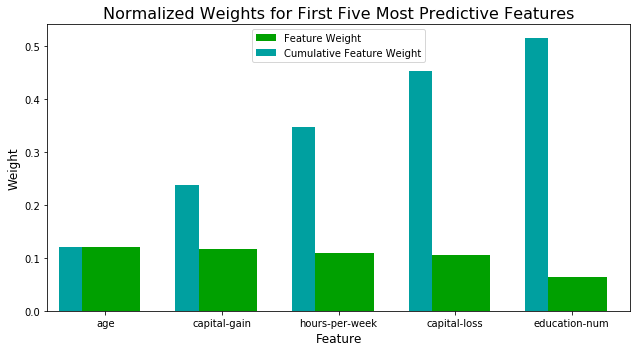

In [12]:
from sklearn.ensemble import GradientBoostingClassifier

import matplotlib.pyplot as plt

# TODO: Import a supervised learning model that has 'feature_importances_'

# TODO: Train the supervised model on the training set 

#GradientBoostingClassifier
model = GradientBoostingClassifier(random_state=0,n_estimators=500).fit(X_train, y_train)

# TODO: Extract the feature importances
importances = model.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train)

Question 7: Extracting Feature Importances

Observe the visualization created above which displays the five most relevant features for predicting if an individual makes at most or above \$50,000.
How do these five features compare to the five features you discussed in Question 6? 
If you were close to the same answer, how does this visualization confirm your thoughts? If you were not close, why do you think these features are more relevant?

Answer:

Feature Selection:
I had expected capital gain, capital loss, age, hours-per-week, education number and marital status to be the important predictive features to indicate income level of an individual. 

From the five features discussed in Question 6 and the above plot for Normalized weights, I can conclude that my predictions were almost right except that the marital status was not found to be much relevant feature in prediction.

From the above plot I can conclude that capital gain, capital loss, age, hours per week, education num are the features having significant weights.

So this visualization confirms my thoughts that the income of an individual are greatly infulenced by factors like finacial gains/losses, number of hours of work, age and also qualification which are important features to predict a person to be donor or not.


Feature Selection

How does a model perform if we only use a subset of all the available features in the data? With less features required to train, the expectation is that training and prediction time is much lower — at the cost of performance metrics. From the visualization above, we see that the top five most important features contribute more than half of the importance of all features present in the data. This hints that we can attempt to reduce the feature space and simplify the information required for the model to learn. The code cell below will use the same optimized model you found earlier, and train it on the same training set with only the top five important features.


Answer:


It is not advisable to use all the available features in the data. It is not necessary that all the available data is useful.

Feature selection needs to be done because of the following reasons:

1.It enables the machine learning algorithm to train faster.
2.It reduces the complexity of a model and makes it easier to interpret.
3.It improves the accuracy of a model if the right subset is chosen.
4.It reduces overfitting.

The selection of features is independent of any machine learning algorithms. Instead, features are selected on the basis of their scores in various statistical tests for their correlation with the outcome variable.

As you can see in the above plot of 'Normalised weights for first five most predictive features' the 5 features capital gain, capital loss, age, hours per week, education num play a vital role in predicting the outcome.
carry higher weights in predicting the outcome.



In [13]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print ("Final Model trained on full data\n------")
print ("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print ("F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print ("\nFinal Model trained on reduced data\n------")
print ("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print ("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))

Final Model trained on full data
------
Accuracy on testing data: 0.8677
F-score on testing data: 0.7452

Final Model trained on reduced data
------
Accuracy on testing data: 0.8421
F-score on testing data: 0.7003


Question 8: Effects of Feature Selection

How does the final model's F-score and accuracy score on the reduced data using only five features compare to those same scores when all features are used?
If training time was a factor, would you consider using the reduced data as your training set?

A. Feature selection is the process of selecting a subset of relevant features (variables, predictors) for use in model construction. Feature selection techniques are used for four reasons: 1.simplification of models to make them easier to interpret by researchers/users 2.shorter training times, 3.to avoid the curse of dimensionality, 4.enhanced generalization by reducing overfitting Thus reducing the data to only five features also reduces the F-score and accuracy of the predictions.

B. Increased training data has practical concerns like memory and processor time. It is not always necessary to have a huge dataset as this might not be much useful if additional training data is noisy. So it is the situation of either more data or better algorithms. So if training time was a factor, I would consider using the reduced data but with a much better algorithm. (ref: https://www.kdnuggets.com/2015/06/machine-learning-more-data-better-algorithms.html)
